### 1. Configuración del Entorno en Google Colab
**Objetivo:** Implementar y entrenar una Red Neuronal Densa (DNN) usando TensorFlow/Keras para clasificar imágenes del dataset Digits de Scikit-learn. Se cubren las etapas de preprocesamiento de datos de imagen, definición de la arquitectura, entrenamiento y evaluación.

In [2]:
import tensorflow as tf
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

# Instalar librerías adicionales si es necesario
!pip install seaborn plotly

# Importaciones estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')


# Librerías CRÍTICAS de Deep Learning
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits # Dataset a utilizar

print(f"TensorFlow versión: {tf.__version__}")
print("Entorno de Deep Learning configurado.")

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Entorno configurado correctamente en Google Colab")

GPU disponible: []
TensorFlow versión: 2.19.0
Entorno de Deep Learning configurado.
Entorno configurado correctamente en Google Colab


### 2. Carga y Preprocesamiento de Datos (Digits)
El dataset Digits contiene pequeñas imágenes de 8x8 píxeles de dígitos escritos a mano (0 a 9).

### 2.1. Carga y Preprocesamiento del Dataset Digits

Para Deep Learning, los datos deben estar en el formato correcto:
1. **Normalización:** Los valores de píxeles deben estar entre 0 y 1.
2. **One-Hot Encoding:** La variable objetivo (la etiqueta del dígito) debe transformarse en formato binario.

In [3]:
# 1. Carga del Dataset
digits = load_digits()
X = digits.data  # Las imágenes (64 píxeles aplanados)
y = digits.target # Las etiquetas (0 a 9)

# 2. Normalización (Escalado de 0-1)
# Los datos originales van de 0 a 16. Dividimos por 16.0 para normalizar.
X_normalized = X / 16.0

# 3. One-Hot Encoding del Target
# Convierte las etiquetas (ej. 3) a un vector binario (ej. [0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
y_one_hot = to_categorical(y)
num_classes = y_one_hot.shape[1] # Esto será 10 (dígitos 0 al 9)

print(f"Dimensión de los datos (X): {X_normalized.shape}")
print(f"Dimensión de las etiquetas One-Hot (y): {y_one_hot.shape}")

# 4. Separación de Datos (Train/Test)
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y_one_hot, test_size=0.2, random_state=42
)

print(f"Datos de entrenamiento: {X_train.shape}")

Dimensión de los datos (X): (1797, 64)
Dimensión de las etiquetas One-Hot (y): (1797, 10)
Datos de entrenamiento: (1437, 64)


### 2.2. Definición y Entrenamiento del Modelo Keras
Definiremos una red neuronal simple con capas Dense (totalmente conectadas).
### Definición, Compilación y Entrenamiento de la Red Neuronal

Usaremos un modelo **Sequential** (capas apiladas). La arquitectura será simple: una capa de entrada (64 neuronas), una capa oculta, y una capa de salida con 10 neuronas (una por dígito).

La función de activación **softmax** es esencial para problemas de clasificación multiclase.

In [4]:
# 1. Definición del Modelo
model = Sequential([
    # Capa de entrada (64 features aplanadas)
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),

    # Capa oculta (reduce la dimensionalidad)
    Dense(64, activation='relu'),

    # Capa de salida (10 clases/dígitos)
    Dense(num_classes, activation='softmax')
])

# 2. Compilación del Modelo
# Loss: 'categorical_crossentropy' para One-Hot Encoding
# Optimizer: 'adam' es un optimizador eficiente
# Metrics: 'accuracy' para medir la exactitud
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Arquitectura de la Red Neuronal:")
model.summary()

Arquitectura de la Red Neuronal:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,226 (67.29 KB)

 Trainable params: 17,226 (67.29 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 3. Entrenamiento (¡Esta es la parte que consume tiempo y recursos!)
# epochs: número de veces que el modelo ve todos los datos
# batch_size: número de muestras por actualización de gradiente
history = model.fit(
    X_train, y_train,
    epochs=50, # 50 iteraciones completas sobre los datos
    batch_size=32,
    validation_data=(X_test, y_test), # Usamos el set de prueba para monitorear el rendimiento
    verbose=1 # Muestra el progreso en la consola
)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3379 - loss: 2.1282 - val_accuracy: 0.8278 - val_loss: 1.3351
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8573 - loss: 1.0516 - val_accuracy: 0.8944 - val_loss: 0.4736
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9091 - loss: 0.4274 - val_accuracy: 0.9278 - val_loss: 0.2736
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9468 - loss: 0.2716 - val_accuracy: 0.9556 - val_loss: 0.2018
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9577 - loss: 0.1905 - val_accuracy: 0.9583 - val_loss: 0.1600
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9688 - loss: 0.1481 - val_accuracy: 0.9639 - val_loss: 0.1334
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9697 - loss: 0.1266 - val_accuracy: 0.9722 - val_loss: 0.1283
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9678 - loss: 0.1287 - val_accuracy: 0.9611 - val_loss:

3. Evaluación del Modelo y Conclusiones
### Evaluación del Modelo

Evaluamos el modelo entrenado con los datos de prueba y visualizamos cómo se comportó la exactitud y la pérdida durante el entrenamiento (las 50 epochs).

Pérdida (Loss) en el set de prueba: 0.0960
Exactitud (Accuracy) en el set de prueba: 0.9750


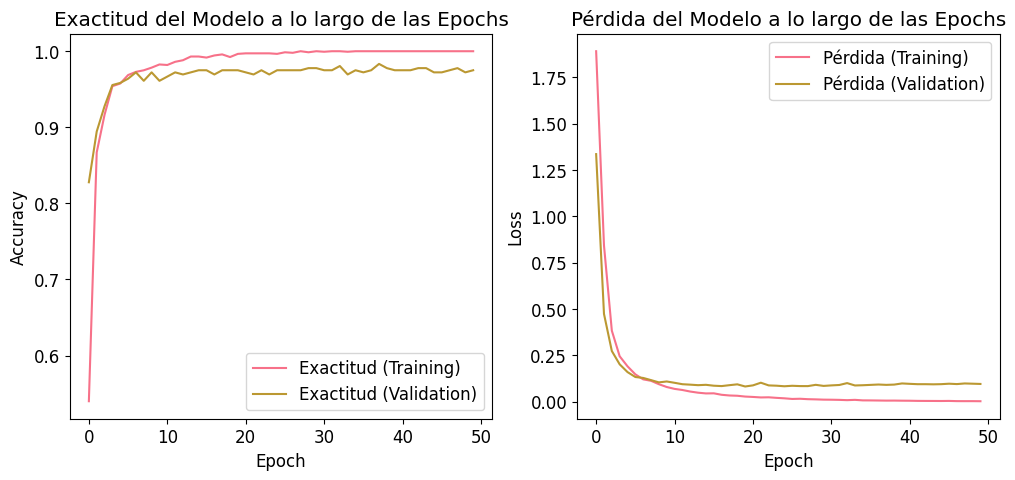

In [6]:
# 1. Evaluación Final con el set de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida (Loss) en el set de prueba: {loss:.4f}")
print(f"Exactitud (Accuracy) en el set de prueba: {accuracy:.4f}")

# 2. Visualización del Historial de Entrenamiento

# Gráfico de Exactitud
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Exactitud (Training)')
plt.plot(history.history['val_accuracy'], label='Exactitud (Validation)')
plt.title('Exactitud del Modelo a lo largo de las Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida (Training)')
plt.plot(history.history['val_loss'], label='Pérdida (Validation)')
plt.title('Pérdida del Modelo a lo largo de las Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

4. Integración con Github

In [ ]:
from getpass import getpass
from google.colab import drive
from google.colab import auth
import subprocess
import os

# =================================================================================
# 1. CONFIGURACIÓN DEL NOTEBOOK ACTUAL (¡PARA EL NOTEBOOK 4!)
# =================================================================================
NOTEBOOK_NAME = "04_Deep_Learning_Intro.ipynb"
COMMIT_MESSAGE = f"Completado: {NOTEBOOK_NAME} - Redes Neuronales y Clasificación Digits"


# =================================================================================
# 2. VARIABLES DE REPOSITORIO (NO MODIFICAR)
# =================================================================================
REPO_NAME = "UEES-IA-Semana1-FloresDenisse"
GITHUB_USERNAME = "defloresa-uees"
GIT_EMAIL = "defloresa@uees.edu.ec"
GIT_NAME = "Flores Denisse"
DRIVE_NOTEBOOK_PATH = f"/content/drive/MyDrive/Colab Notebooks/{NOTEBOOK_NAME}"


# =================================================================================
# 3. AUTENTICACIÓN Y CONEXIONES
# =================================================================================

# Pide el token de GitHub de forma segura
github_token = getpass(f"Pega tu token de GitHub aquí (para {NOTEBOOK_NAME}): ")

# Montar Drive (necesario para copiar el archivo)
drive.mount('/content/drive', force_remount=True)
auth.authenticate_user()

# Configuración de Git (Identidad del autor)
!git config --global user.email "{GIT_EMAIL}"
!git config --global user.name "{GIT_NAME}"


# =================================================================================
# 4. CLONACIÓN, COPIA Y NAVEGACIÓN
# =================================================================================

%cd /content
print(f"\nBorrando intento anterior de clonación de {REPO_NAME}...")
!rm -rf {REPO_NAME}

print(f"Clonando el repositorio {REPO_NAME}...")
!git clone https://github.com/{GITHUB_USERNAME}/{REPO_NAME}.git /content/{REPO_NAME}

# Navegar a la carpeta clonada
%cd /content/{REPO_NAME}

# Crear estructura y Copia el archivo DESDE GOOGLE DRIVE
!mkdir -p ./02_Laboratorio/notebooks/
print(f"\nCopiando el notebook '{NOTEBOOK_NAME}' desde Google Drive...")

# La ruta de origen es la de Drive (Corregida)
!cp "{DRIVE_NOTEBOOK_PATH}" ./02_Laboratorio/notebooks/


# =================================================================================
# 5. COMMIT Y PUSH FINAL
# =================================================================================

# Commit
!git add .
!git commit -m "{COMMIT_MESSAGE}"

# Configuración del Token en la URL remota para el push (CRÍTICO)
subprocess.run(["git", "remote", "set-url", "origin", f"https://{github_token}@github.com/{GITHUB_USERNAME}/{REPO_NAME}.git"])

# Push final
!git push origin main

print(f"\n✅ ¡Notebook {NOTEBOOK_NAME} subido exitosamente a GitHub! Has completado todos los laboratorios de la Semana 1.")
print("Verifica el link: https://github.com/{GITHUB_USERNAME}/{REPO_NAME}")

Pega tu token de GitHub aquí (para 04_Deep_Learning_Intro.ipynb): ··········
Mounted at /content/drive
